# **CASE: INFLAÇÃO**

---

### Instalação de bibliotecas

In [1]:
# Para teste de estacionariedade
install.packages("urca")
# Para ajuste automático de modelo ARIMA e realização de previsões
install.packages("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘curl’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘generics’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘RcppArmadillo’




### Carregamento de bibliotecas

In [2]:
library(urca)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



### Leitura da base de dados

In [3]:
dados_inflacao <- read.table(file = "../Dados/Inflacao.txt",
                             sep = "\t",
                             dec = ".",
                             header = TRUE)

### Visualização da base de dados

In [4]:
View(dados_inflacao)

MES,IPCA,IGPM
<chr>,<dbl>,<dbl>
2021-01,0.0025,0.0258
2021-02,0.0086,0.0253
2021-03,0.0093,0.0294
2021-04,0.0031,0.0151
2021-05,0.0083,0.0410
2021-06,0.0053,0.0060
2021-07,0.0096,0.0078
2021-08,0.0087,0.0066
2021-09,0.0116,-0.0064


### Definição das séries

In [5]:
# Série de IPCA (resposta)
serie_ipca <- ts(dados_inflacao$IPCA,
                 start = c(2021, 1),
                 end = c(2023, 12),
                 frequency = 12)

In [6]:
# Série de IGP-M (explicativa)
serie_igpm <- ts(dados_inflacao$IGPM,
                 start = c(2021, 1),
                 end = c(2023, 12),
                 frequency = 12)

### Análise exploratória das séries

In [7]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
reset_options <- options()
options(repr.plot.width = 14, repr.plot.height = 5)

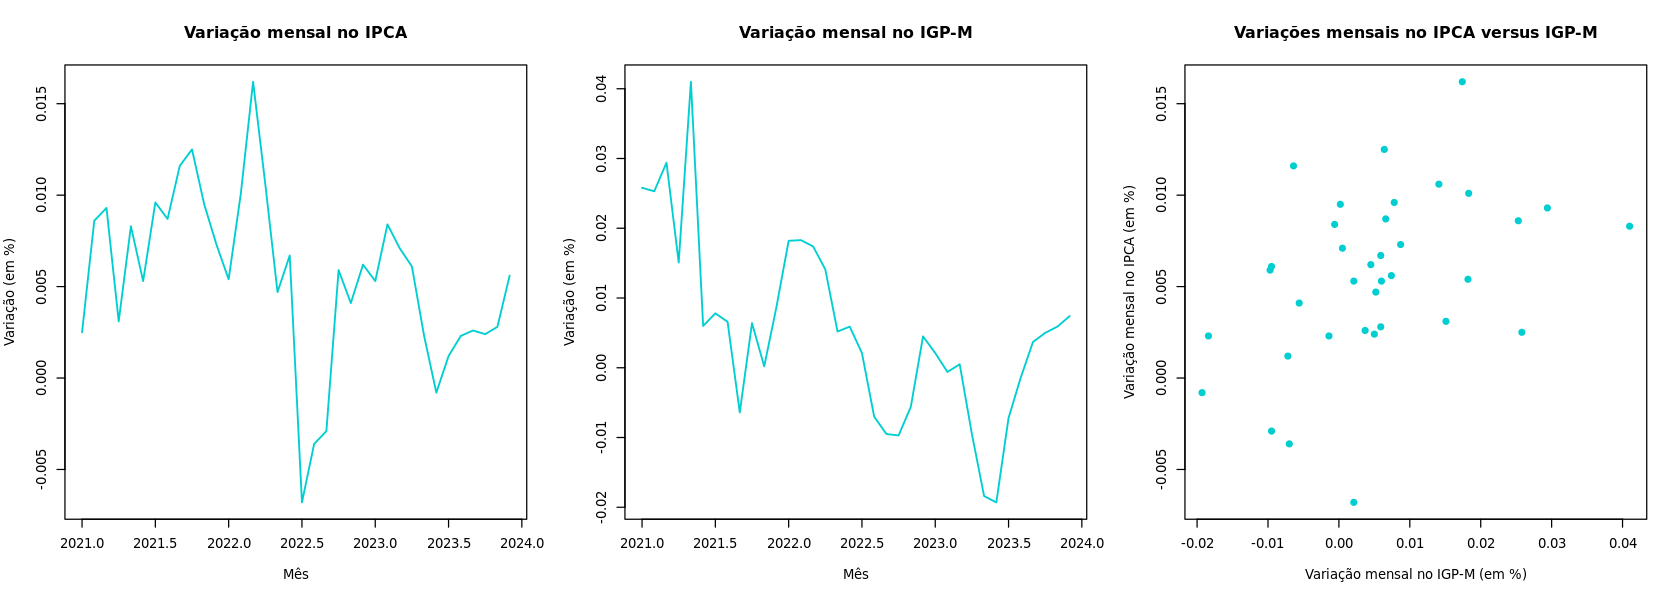

In [8]:
# Gráficos individuais das séries e gráfico de dispersão
par(mfrow = c(1,3))
plot(serie_ipca,
     type = "l",
     lwd  = 1.5,
     col  = "darkturquoise",
     main = "Variação mensal no IPCA",
     xlab = "Mês",
     ylab = "Variação (em %)")
plot(serie_igpm,
     type = "l",
     lwd  = 1.5,
     col  = "darkturquoise",
     main = "Variação mensal no IGP-M",
     xlab = "Mês",
     ylab = "Variação (em %)")
plot(dados_inflacao$IGPM,
     dados_inflacao$IPCA,
     col  = "darkturquoise",
     pch  = 19,
     main = "Variações mensais no IPCA versus IGP-M",
     xlab = "Variação mensal no IGP-M (em %)",
     ylab = "Variação mensal no IPCA (em %)")

In [9]:
# Teste de estacionariedade de Dickey-Fuller Generalizado (DF-GLS) para série de IPCA
teste_ipca <- ur.ers(serie_ipca)
summary(teste_ipca)


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0118370 -0.0011112  0.0001352  0.0025606  0.0081104 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
yd.lag       -0.39771    0.19896  -1.999   0.0562 .
yd.diff.lag1  0.09404    0.21571   0.436   0.6665  
yd.diff.lag2  0.24364    0.19413   1.255   0.2206  
yd.diff.lag3 -0.09741    0.19587  -0.497   0.6231  
yd.diff.lag4 -0.01182    0.17725  -0.067   0.9473  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003826 on 26 degrees of freedom
Multiple R-squared:  0.258,	Adjusted R-squared:  0.1153 
F-statistic: 1.808 on 5 and 26 DF,  p-value: 0.1463


Value of test-statistic is: -1.999 

Critical values

In [10]:
# Verificação de se é possível rejeitar a hipótese nula de não estacionariedade (TRUE representa sim, FALSE representa não)
teste_ipca@teststat < teste_ipca@cval

,1pct,5pct,10pct
critical values,FALSE,TRUE,TRUE


In [11]:
# Teste de estacionariedade de Dickey-Fuller Generalizado (DF-GLS) para série de IGP-M
teste_igpm <- ur.ers(serie_igpm)
summary(teste_igpm)


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0237919 -0.0057374 -0.0019391  0.0008022  0.0103084 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
yd.lag       -0.19213    0.10827  -1.774   0.0877 .
yd.diff.lag1 -0.08222    0.16135  -0.510   0.6146  
yd.diff.lag2  0.30191    0.15978   1.890   0.0700 .
yd.diff.lag3  0.13867    0.16593   0.836   0.4109  
yd.diff.lag4 -0.29003    0.15709  -1.846   0.0763 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.007669 on 26 degrees of freedom
Multiple R-squared:  0.384,	Adjusted R-squared:  0.2655 
F-statistic: 3.241 on 5 and 26 DF,  p-value: 0.02091


Value of test-statistic is: -1.7745 

Critical valu

In [12]:
# Verificação de se é possível rejeitar a hipótese nula de não estacionariedade (TRUE representa sim, FALSE representa não)
teste_igpm@teststat < teste_igpm@cval

,1pct,5pct,10pct
critical values,FALSE,FALSE,TRUE


### Modelo de regressão linear simples

In [13]:
# Comando auxiliar para para omitir notação científica nos p-valores
options(scipen = 999)

In [14]:
# Ajuste do modelo
modelo_lin <- lm(serie_ipca ~ serie_igpm)
summary(modelo_lin)


Call:
lm(formula = serie_ipca ~ serie_igpm)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0118295 -0.0025902  0.0001763  0.0027120  0.0088377 

Coefficients:
             Estimate Std. Error t value    Pr(>|t|)    
(Intercept) 0.0047093  0.0007738   6.086 0.000000666 ***
serie_igpm  0.1524677  0.0559545   2.725      0.0101 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004299 on 34 degrees of freedom
Multiple R-squared:  0.1792,	Adjusted R-squared:  0.1551 
F-statistic: 7.425 on 1 and 34 DF,  p-value: 0.01009


In [15]:
# Cálculo dos valores preditos
predito_modelo_lin <- ts(modelo_lin$fitted.values,
                         start = c(2021, 1),
                         end = c(2023, 12),
                         frequency = 12)

### Modelo de regressão linear temporal com erros (S)ARIMA

In [16]:
# Ajuste do melhor modelo
modelo_lin_arima <- auto.arima(serie_ipca, xreg = serie_igpm)
print(modelo_lin_arima)

Series: serie_ipca 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1  intercept    xreg
      0.5507     0.0046  0.1347
s.e.  0.1393     0.0013  0.0623

sigma^2 = 0.0000133:  log likelihood = 152.41
AIC=-296.81   AICc=-295.52   BIC=-290.48


### Comparação visual dos modelos

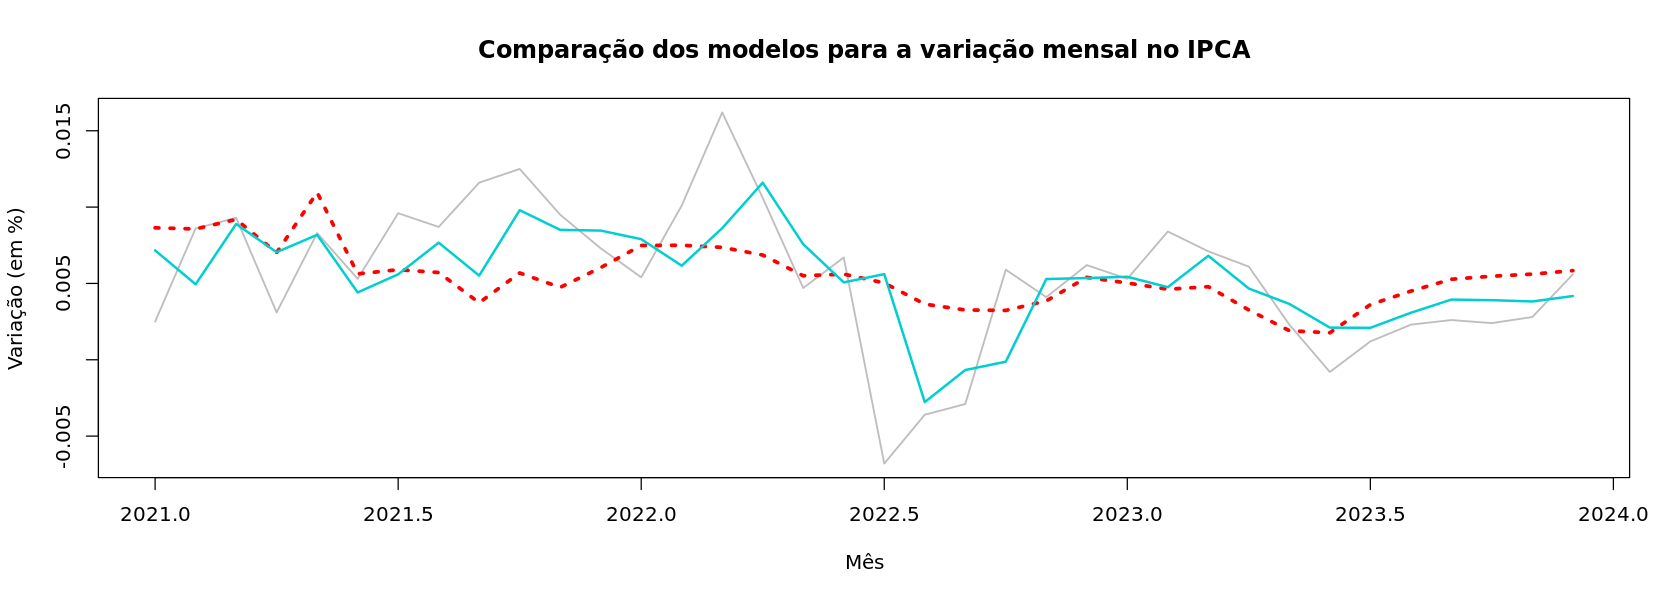

In [17]:
# Gráfico dos valores observados da série versus valores preditos pelos dois modelos anteriores
par(mfrow = c(1,1))
plot(serie_ipca,
     type = "l",
     lwd = 1.5,
     col = "grey",
     main = "Comparação dos modelos para a variação mensal no IPCA",
     xlab = "Mês",
     ylab = "Variação (em %)")
points(predito_modelo_lin,
       type = "l",
       lty = 3,
       lwd = 3,
       col = "red")
points(modelo_lin_arima$fitted,
       type = "l",
       lwd = 2,
       col = "darkturquoise")

### Diagnóstico dos modelos

In [18]:
# Cálculo do REQM para modelo de regressão linear simples
sqrt(mean(modelo_lin$residuals^2))

[1] 0.004177796

In [19]:
# Cálculo do REQM para modelo de regressão linear temporal com erros (S)ARIMA
sqrt(mean(modelo_lin_arima$residuals^2))

[1] 0.003491437

### Previsões do melhor modelo





In [20]:
# Salvando num objeto à parte o valor esperado para o índice IGP-M para o próximo mês
dados_xreg <- c(0.0022)

In [21]:
# Previsões para o próximo mês
previsoes <- forecast(modelo_lin_arima, h = 1, xreg = dados_xreg)
round(previsoes$mean, 4)

,Jan
2024,0.0049


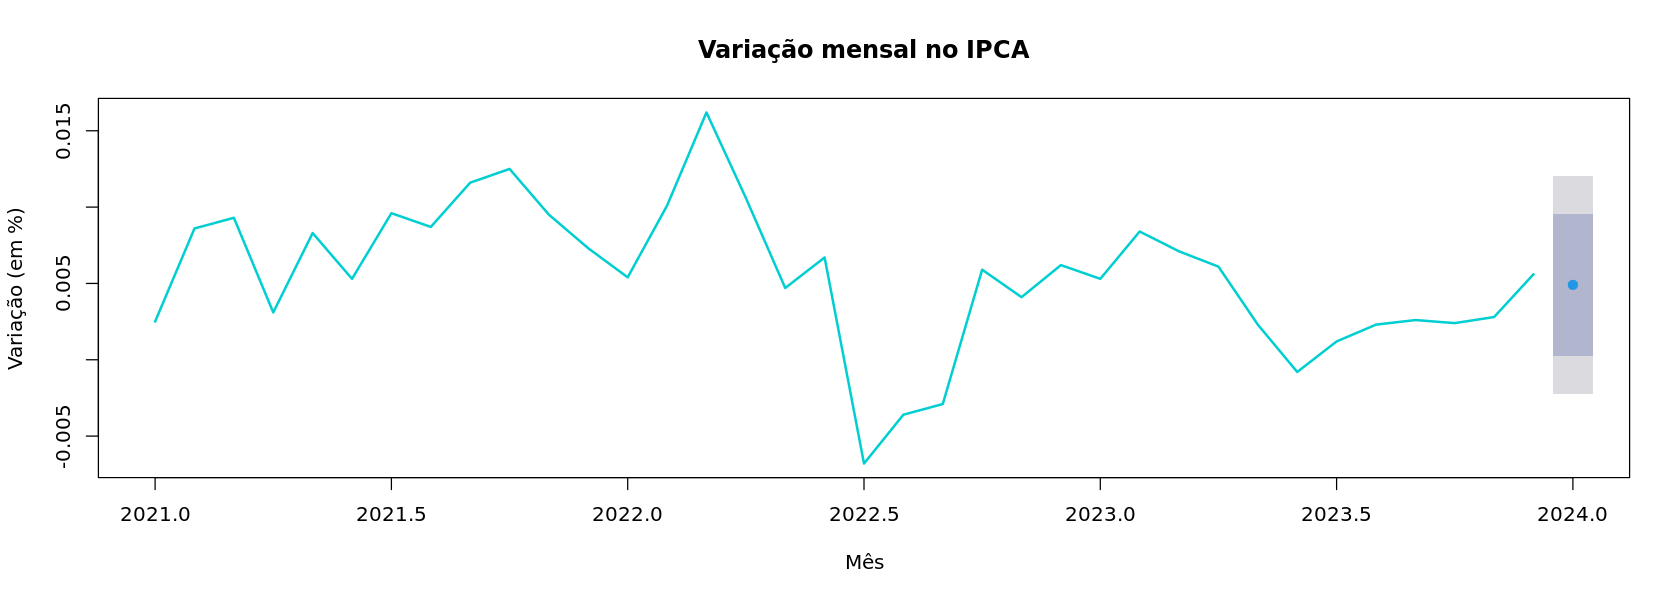

In [22]:
# Gráfico da série de IPCA, incluindo previsão
plot(previsoes,
     type = "l",
     lwd = 2,
     col = "darkturquoise",
     main = "Variação mensal no IPCA",
     xlab = "Mês",
     ylab = "Variação (em %)")